In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

# from netpyne import sim
# cfg, netParams = sim.readCmdLineArgs()
# sim.initialize(
#     simConfig = cfg,
#     netParams = netParams)


In [2]:
batchName = 'v0_batch3'
with open(batchName + '/' + batchName + '_batch.json', 'r') as f:
        batchInfo = json.load(f) 
        
params = batchInfo['batch']['params']       
for name in params:
    print(name['label'])
    print(name['values'])
    
rateStimE = params[0]['values']
rateStimI = params[1]['values']

data = {}
paramsNameList = []
for p1 in range(np.size(rateStimE)):
    for p2 in range(np.size(rateStimI)):   
        paramsName  = 'rateStimE' + str(rateStimE[p1]) + '_rateStimI' + str(rateStimI[p2])
        paramsNameList.append(paramsName)
        with open(batchName + '/' + batchName + '_' + str(p1) + '_' + str(p2) + '.json', 'r') as f:
            data[paramsName] = json.load(f) 

batchName = 'v0_batch4'
with open(batchName + '/' + batchName + '_batch.json', 'r') as f:
        batchInfo = json.load(f) 
        
params = batchInfo['batch']['params']       
for name in params:
    print(name['label'])
    print(name['values'])
    
rateStimE = params[0]['values']
rateStimI = params[1]['values']

# data = {}
# paramsNameList = []
for p1 in range(np.size(rateStimE)):
    for p2 in range(np.size(rateStimI)):   
        paramsName  = 'rateStimE' + str(rateStimE[p1]) + '_rateStimI' + str(rateStimI[p2])
        paramsNameList.append(paramsName)
        with open(batchName + '/' + batchName + '_' + str(p1) + '_' + str(p2) + '.json', 'r') as f:
            data[paramsName] = json.load(f) 

rateStimE
[1.0, 2.0]
rateStimI
[3.0, 6.0]
rateStimE
[3.0]
rateStimI
[6.0, 9.0]


In [3]:
popNumber = np.linspace(1, 55, 55)
popParamLabels = list(data[paramsName]['simData']['popRates'])
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in popParamLabels:
    if popName not in Epops:
        Ipops.append(popName)

In [4]:
paramsNameList

['rateStimE1.0_rateStimI3.0',
 'rateStimE1.0_rateStimI6.0',
 'rateStimE2.0_rateStimI3.0',
 'rateStimE2.0_rateStimI6.0',
 'rateStimE3.0_rateStimI6.0',
 'rateStimE3.0_rateStimI9.0']

In [5]:
#------------------------------------------------------------------------------  
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('info/anatomy/S1-cells-distributions-Mouse.txt') as mtype_file:
	mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellParamLabels = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cellNumber[metype] = int(n)
	popLabel[metype] = mtype
	popNumber[mtype] = int(m)

	cellParamLabels.append(metype)


popNameName = {}
for mtype in popParamLabels:
    popNameName[mtype] = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	popNameName[mtype].append(metype)

In [6]:
recordCells = []
cellNameName = {}
for metype in cellParamLabels:
    cellNameName[metype] = []

cellNumberLabel = 0 
for metype in cellParamLabels:
    if cellNumber[metype] < 5:
        for numberME in range(cellNumber[metype]):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
    else:
        for numberME in range(5):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
                         
    cellNumberLabel = cellNumberLabel + cellNumber[metype]

# cellNameName = {}

# number = 0
# for cellName in list(data[paramsName]['simData']['V_soma']):
#     cellNameName[popParamLabels[number]] = cellName
#     number = number + 1

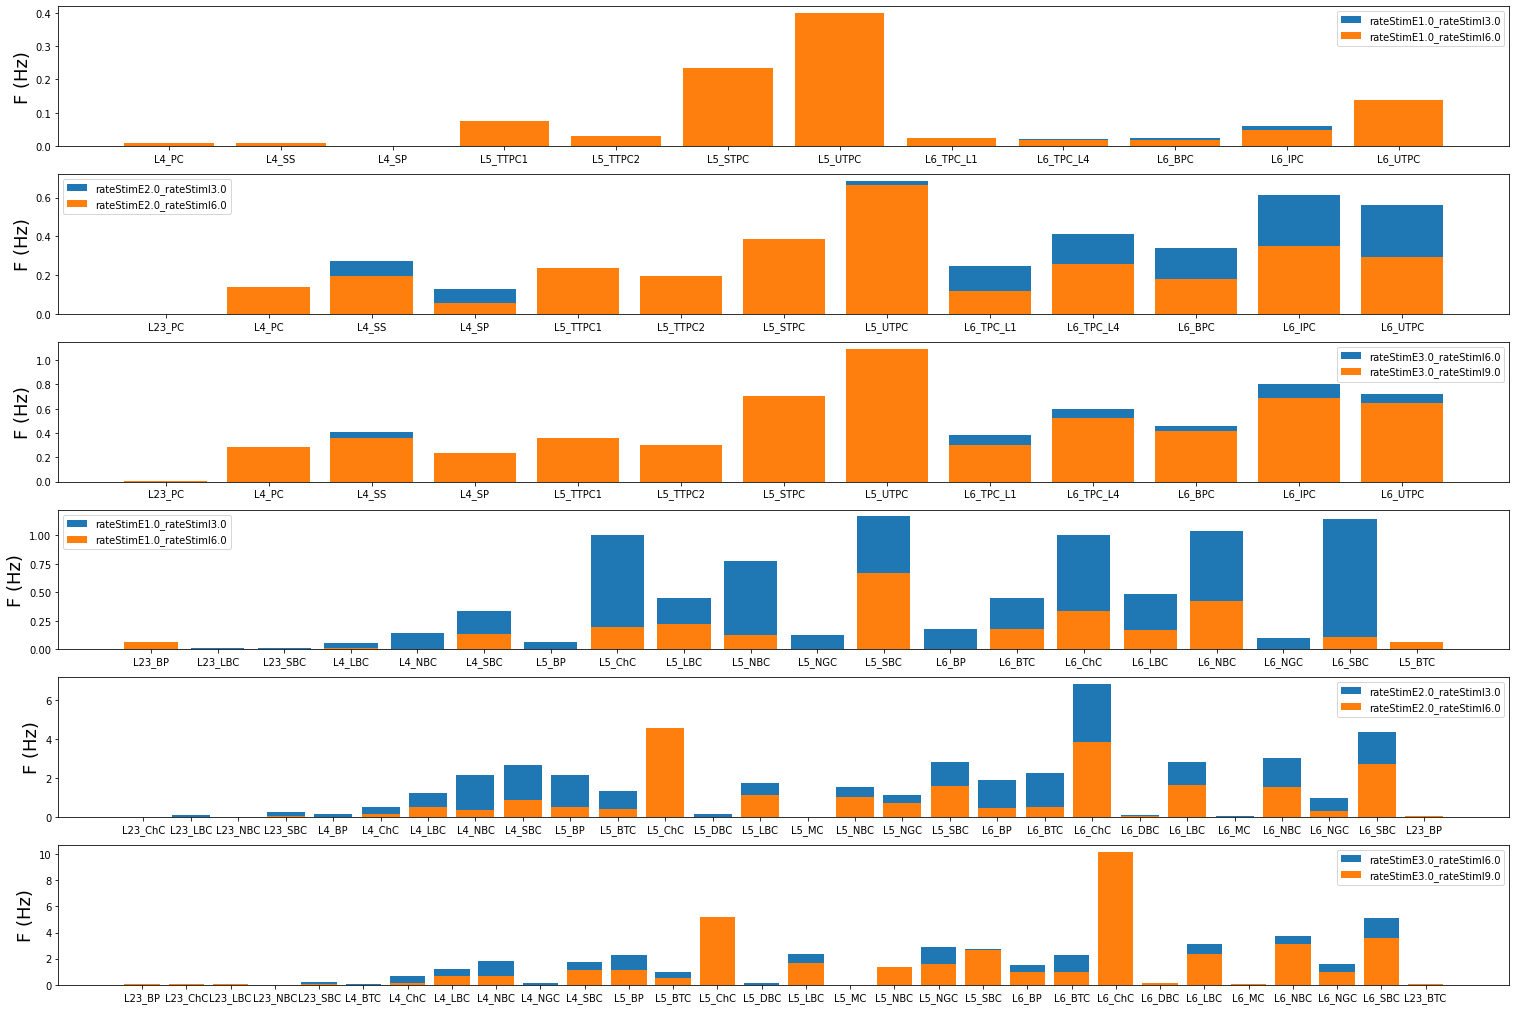

In [137]:
plt.figure(figsize=(26,18))
plt.subplot(6, 1, 1)     
for paramsName in paramsNameList[0:2]:
    popRates = []
    popNames = []
    for popName in Epops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()
plt.subplot(6, 1, 4)     
for paramsName in paramsNameList[0:2]:
    popRates = []
    popNames = []
    for popName in Ipops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()
plt.subplot(6, 1, 2)     
for paramsName in paramsNameList[2:4]:
    popRates = []
    popNames = []
    for popName in Epops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()
plt.subplot(6, 1, 5)     
for paramsName in paramsNameList[2:4]:
    popRates = []
    popNames = []
    for popName in Ipops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()
plt.subplot(6, 1, 3)     
for paramsName in paramsNameList[4:6]:
    popRates = []
    popNames = []
    for popName in Epops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()  
plt.subplot(6, 1, 6)     
for paramsName in paramsNameList[4:6]:
    popRates = []
    popNames = []
    for popName in Ipops:
        if data[paramsName]['simData']['popRates'][popName] > 0:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
    plt.bar(popNames,popRates, label=paramsName) 
    plt.ylabel('F (Hz)', fontsize=18)
    plt.xticks(fontsize=10)
    plt.legend()  

plt.savefig('FR_' + batchName + '_StimINH.png', facecolor = 'white', bbox_inches='tight' , dpi=300)
# plt.close()

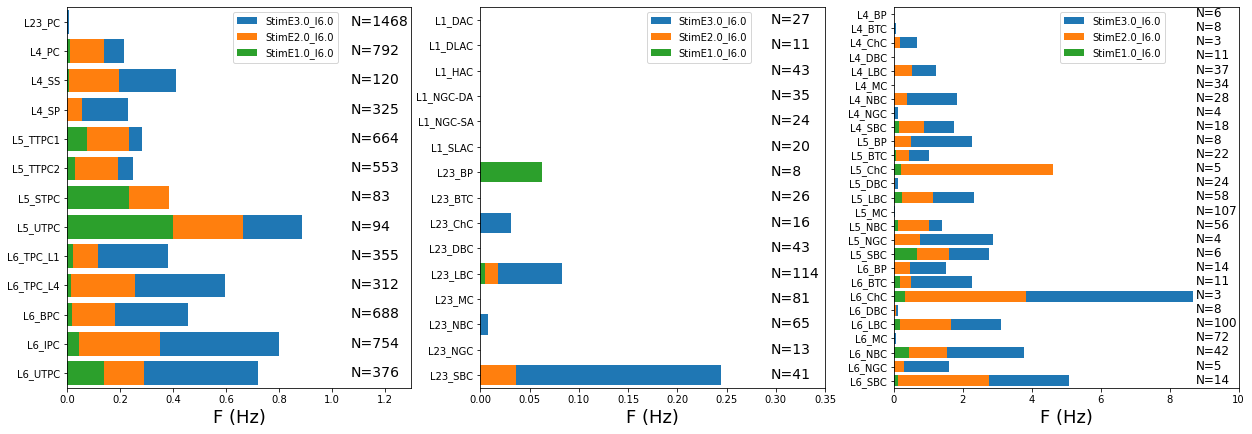

In [136]:
plt.figure(figsize=(21,7))
plt.subplot(1, 3, 1)     
paramsName = paramsNameList[4]
popRates = []
popNames = []
number = 0
for popName in Epops:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[3]
popRates = []
popNames = []
number = 0
for popName in Epops:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[1]
popRates = []
popNames = []
number = 0
for popName in Epops:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    plt.text(1.07, number + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

plt.ylim(12.5,-0.5)
plt.xlim(0,1.3)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
#----------------------------------------------------------------------------------
plt.subplot(1, 3, 2)     
paramsName = paramsNameList[4]
popRates = []
popNames = []
number = 0
for popName in Ipops[0:15]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[3]
popRates = []
popNames = []
number = 0
for popName in Ipops[0:15]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[1]
popRates = []
popNames = []
number = 0
for popName in Ipops[0:15]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    plt.text(0.295, number + 0.15, 'N=' + str(popNumber[popName]), fontsize=14)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

plt.ylim(14.5,-0.5)
plt.xlim(0,0.35)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
#----------------------------------------------------------------------------------
plt.subplot(1, 3, 3)     
paramsName = paramsNameList[4]
popRates = []
popNames = []
number = 0
for popName in Ipops[15:]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[3]
popRates = []
popNames = []
number = 0
for popName in Ipops[15:]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

paramsName = paramsNameList[1]
popRates = []
popNames = []
number = 0
for popName in Ipops[15:]:
    popRates.append(data[paramsName]['simData']['popRates'][popName])
    popNames.append(popName)
    plt.text(8.75, number + 0.2, 'N=' + str(popNumber[popName]), fontsize=12)
    number = number + 1
plt.barh(popNames,popRates, label=paramsName[4:13] + paramsName[21:]) 

plt.ylim(26.5,-0.5)
plt.xlim(0,10.0)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))

plt.savefig('FR_' + batchName + '_StimEXC.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

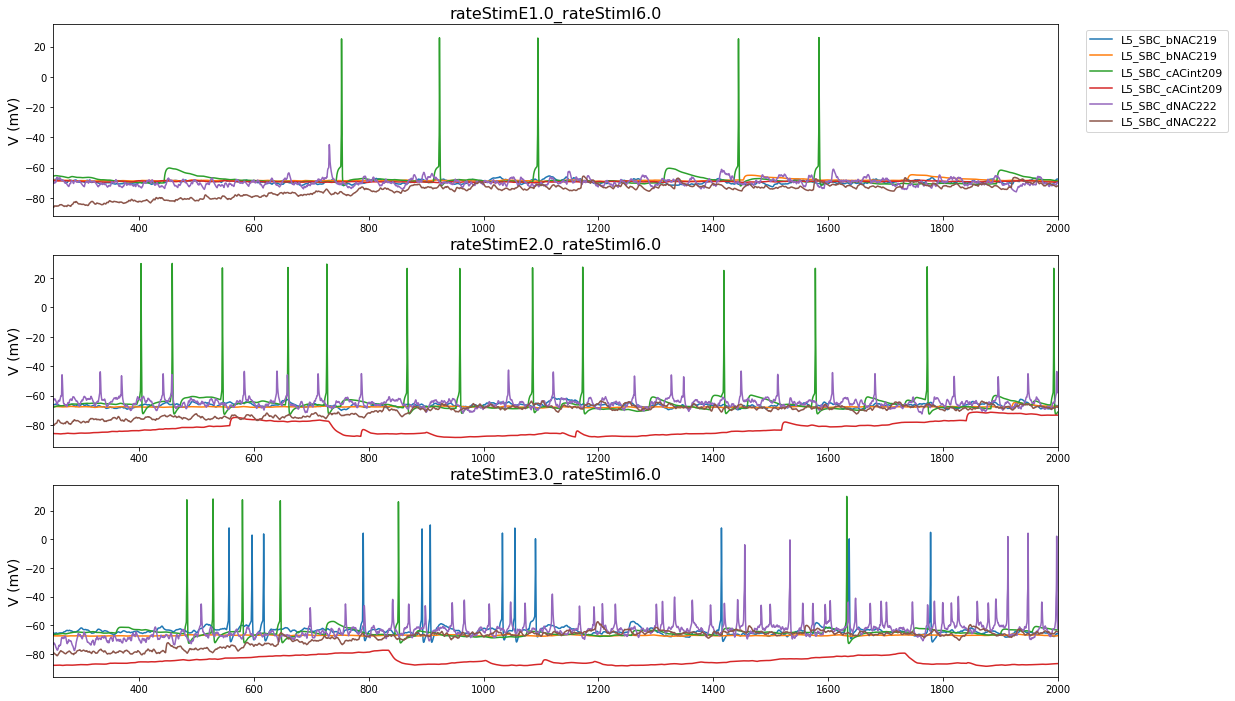

In [152]:
plt.figure(figsize=(18,12)) 
time = np.linspace(0, 2000, 20001)

popName = 'L5_SBC'

plt.subplot(3, 1, 1) 
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:
        for paramsName in paramsNameList[1:2]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.legend(loc='upper right', bbox_to_anchor=(1.175, 1.0), fontsize=11)
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(250, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(3, 1, 2)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:   
        for paramsName in paramsNameList[3:4]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(250, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(3, 1, 3)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]  
    for cellName in cellNames: 
        for paramsName in paramsNameList[4:5]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(250, 2000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    
        
plt.savefig('Vt_' + popName + '_' + batchName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [18]:
paramsNameList

['rateStimE1.0_rateStimI3.0',
 'rateStimE1.0_rateStimI6.0',
 'rateStimE2.0_rateStimI3.0',
 'rateStimE2.0_rateStimI6.0',
 'rateStimE3.0_rateStimI6.0',
 'rateStimE3.0_rateStimI9.0']

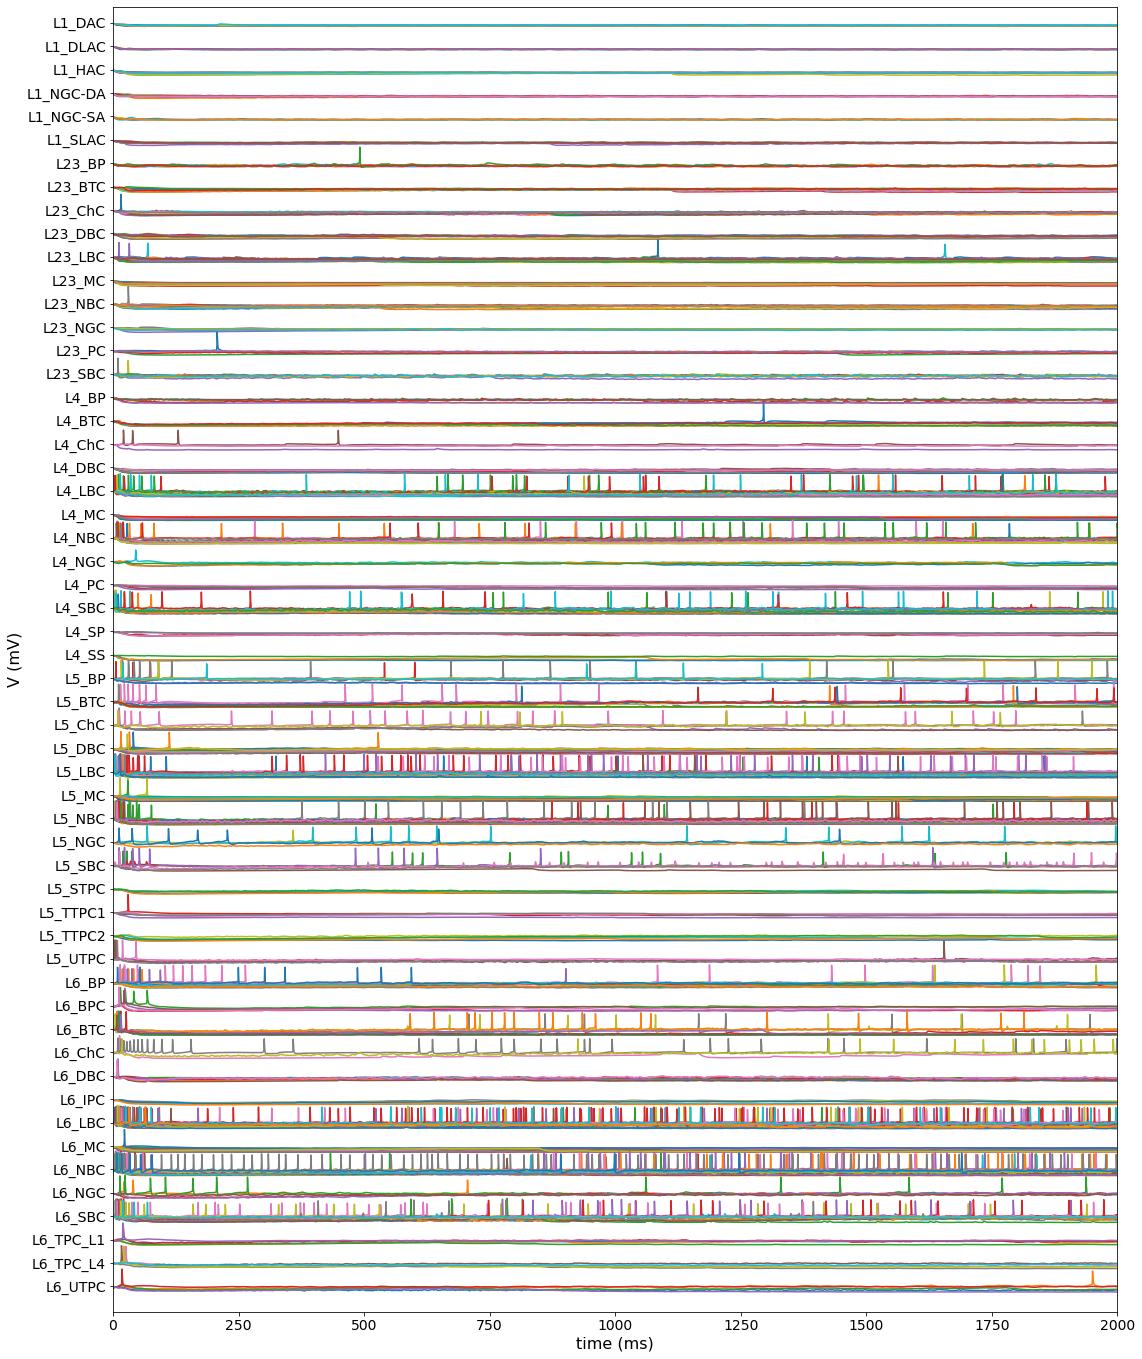

In [155]:
plt.figure(figsize=(18,24)) 
time = np.linspace(0, 2000, 20001)
plt.ylabel('V (mV)', fontsize=16)
plt.xlabel('time (ms)', fontsize=16)
plt.xlim(0, 2000)
# plt.ylim(-80, -30)
plt.ylim(-6670,20)
plt.yticks(np.arange(-6540,60,120),popParamLabels[::-1], fontsize=14)
plt.xticks(fontsize=14)

paramsName = paramsNameList[4]
number = 0
for popName in popParamLabels:   
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            Vt = np.array(data[paramsName]['simData']['V_soma'][cellName])
            plt.plot(time, (Vt-number*120.0)) 
    number = number + 1

plt.savefig('Vt_full_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)